# 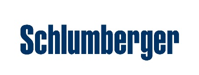


*NTC trial task of ML*
Catboost без Cross validation. лучший вариант 0.754 на полных данных без очистки от выбросов.

Task description
We took 245 measurements (magnetic flaw detection) of metal pipes with different defect types (for example - corrosion, scratch, etc.). 

For each measurements the following info is available in the provided files:

-recordings from three channels over pipe length;

-defect location: external (OD) or internal (ID).

Data description:

data.csv:

    id - measurement identificator;

    time - measurement time, sec.;

    ch0, ch1, ch2 - channels with measurements.

target_train.csv:

    id - measurement identificator;

    target - defect location (ID, OD).

You need to perform:
EDA (exploratory data analysis) and prodive your conclusions.

Supervised classification. Using provided labels train model(s), predict defect location for unlabeled measurements.

Metrics: F1 score (weighted).

Goal: score > 0.8.

Unsipervised clustering. Try to split defects on types using different clustering methods.

You can use full dataset for this task.

Which number of clusters is optimal?

Demonstrate most typical representative of each cluster.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
!pip install catboost
import catboost
from catboost import * 
from catboost import datasets
from matplotlib import pyplot as plt
import collections
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 76.1 MB 48.4 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
# Загрузим данные и посмотрим на небольшую часть
data = pd.read_csv('/content/gdrive/MyDrive/SLB/data/data.csv')
data.head()

,id,time,ch0,ch1,ch2
0,1_1,0,372.272,350.220,408.527
1,1_1,1,373.393,349.846,411.144
2,1_1,2,371.898,350.220,412.639
3,1_1,3,371.898,350.967,413.386
4,1_1,4,371.898,351.341,414.134


In [4]:
# Загрузим размеченные данные и посмотрим на небольшую часть
target = pd.read_csv('/content/gdrive/MyDrive/SLB/target_train/target_train.csv')
target.head()


,id,target
0,111_1,OD
1,103_1,OD
2,34_2,ID
3,78_1,OD
4,71_2,OD


In [5]:
target["target"].value_counts()

OD    64
ID    36
Name: target, dtype: int64

In [6]:
# Информация от данных
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588000 entries, 0 to 587999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      588000 non-null  object 
 1   time    588000 non-null  int64  
 2   ch0     588000 non-null  float64
 3   ch1     588000 non-null  float64
 4   ch2     588000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 22.4+ MB


In [7]:
# Выделим столбцы с фичами  и сольём в один файл размеченными данными
num_cols = list(data.columns[2:])
data2 = pd.merge(data, target)
data2

,id,time,ch0,ch1,ch2,target
0,1_1,0,372.272,350.220,408.527,OD
1,1_1,1,373.393,349.846,411.144,OD
2,1_1,2,371.898,350.220,412.639,OD
3,1_1,3,371.898,350.967,413.386,OD
4,1_1,4,371.898,351.341,414.134,OD
...,...,...,...,...,...,...
239995,209_2,2395,410.770,366.292,420.114,ID
239996,209_2,2396,408.527,368.534,422.357,ID
239997,209_2,2397,408.154,367.787,421.983,ID
239998,209_2,2398,413.386,362.554,421.609,ID


Построим графики

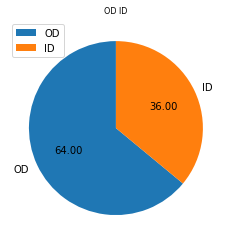

In [8]:
#Посмотрим на распределение целевых меток
fig, ax = plt.subplots()
ax.pie(data2["target"].value_counts(), labels=["OD","ID"],  autopct='%.2f',
         startangle=90)  
ax.set_title(" ".join(["OD","ID"]),fontsize = 8)
ax.legend()
fig.show()

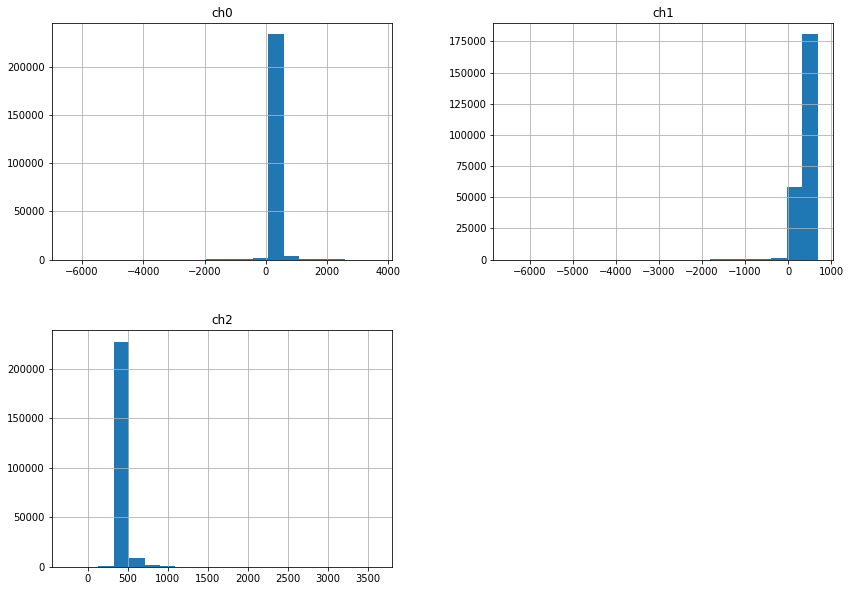

In [9]:
#Графики расределения числовых величин
y = data2.hist(column=num_cols, bins= 20,figsize=(14, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


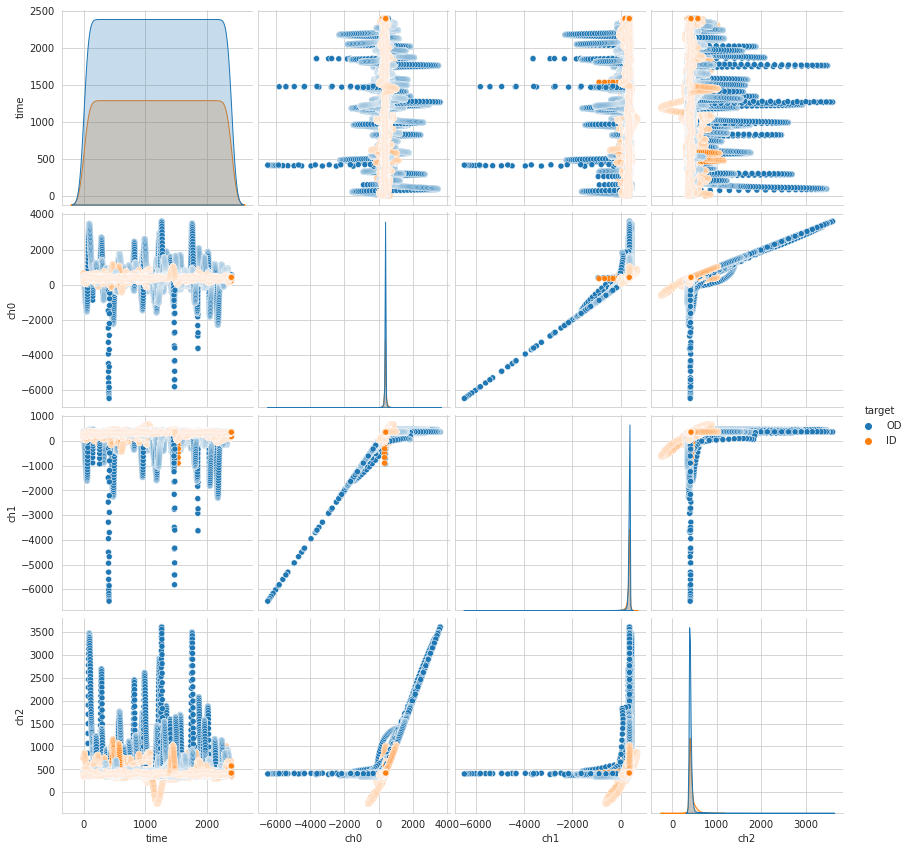

In [10]:
#Построим графики зависимостей между друг другом
sns.set_style("whitegrid");
sns.pairplot(data2, hue="target", size=3);
plt.show()

Text(0.5, 1.0, 'ch2')

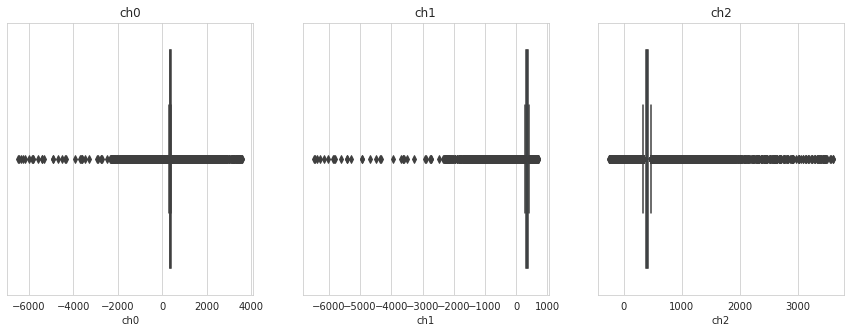

In [11]:
#Посмотрим дипазаон распределения данных по каждому из каналов и их медиану
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], x=data2["ch0"])
axes[0].set_title("ch0")

sns.boxplot(ax=axes[1], x=data2["ch1"])
axes[1].set_title("ch1")

sns.boxplot(ax=axes[2], x=data2["ch2"])
axes[2].set_title("ch2")


Удаление выбросов.(Лучший результат достигался без удаления данных, любое удаление приводило к уменьшению F1_score)

In [ ]:
'''def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [2,95])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#df[(df['y'] < Q1-1.5*IQR ) | (df['y'] > Q1+1.5*IQR)]['y']'''

In [ ]:
'''for chan in num_cols:
  lowerbound,upperbound = outlier_treatment(data2[chan])
  data2.drop(data2[ (data2[chan] > upperbound) | (data2[chan]  < lowerbound) ].index , inplace=True)'''

In [ ]:
'''fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], x=data2["ch0"])
axes[0].set_title("ch0")

sns.boxplot(ax=axes[1], x=data2["ch1"])
axes[1].set_title("ch1")

sns.boxplot(ax=axes[2], x=data2["ch2"])
axes[2].set_title("ch2")'''


Корреляция

In [15]:
data2.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,time,ch0,ch1,ch2
time,1.00,-0.00,-0.01,-0.00
ch0,-0.00,1.00,0.73,0.68
ch1,-0.01,0.73,1.00,0.09
ch2,-0.00,0.68,0.09,1.00


Обучение и модели

In [16]:
#Переведём в числовые значения 
labelencoder = LabelEncoder()
data2["target"] = labelencoder.fit_transform(data2["target"])

In [17]:
labels = data2[data2.columns[-1]] #значения метки класса
feature_matrix = data2[data2.columns[2:-1]].values # признаковые описания

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, make_scorer, roc_auc_score

In [19]:
pca = StandardScaler()
X = pd.DataFrame(data = pca.fit_transform(feature_matrix), columns=num_cols)
y = labels

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2020)


In [21]:
from itertools import product
 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
#clf3 = SVC(kernel='rbf', probability=True)  Takes too much time, even with other kernels
clf4 = RandomForestClassifier(random_state =42)
clf5 = catboost.CatBoostClassifier(eval_metric="F1")
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                      ('RF', clf4), ('CB', clf5)
                                      ], voting='soft')
  
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
#clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)
clf5.fit(X_train, Y_train)
eclf.fit(X_train, Y_train)



Learning rate set to 0.091863
0:	learn: 0.7767087	total: 90.5ms	remaining: 1m 30s
1:	learn: 0.7902957	total: 127ms	remaining: 1m 3s
2:	learn: 0.7949339	total: 162ms	remaining: 53.7s
3:	learn: 0.7959695	total: 205ms	remaining: 51s
4:	learn: 0.7964228	total: 240ms	remaining: 47.8s
5:	learn: 0.7965345	total: 277ms	remaining: 45.8s
6:	learn: 0.7969236	total: 316ms	remaining: 44.8s
7:	learn: 0.7971516	total: 354ms	remaining: 43.9s
8:	learn: 0.7972893	total: 393ms	remaining: 43.2s
9:	learn: 0.7983240	total: 436ms	remaining: 43.2s
10:	learn: 0.7972751	total: 489ms	remaining: 44s
11:	learn: 0.7971123	total: 530ms	remaining: 43.6s
12:	learn: 0.7974797	total: 566ms	remaining: 43s
13:	learn: 0.7977431	total: 610ms	remaining: 43s
14:	learn: 0.7980556	total: 653ms	remaining: 42.9s
15:	learn: 0.7993277	total: 691ms	remaining: 42.5s
16:	learn: 0.8000407	total: 732ms	remaining: 42.3s
17:	learn: 0.8003341	total: 775ms	remaining: 42.3s
18:	learn: 0.8005448	total: 817ms	remaining: 42.2s
19:	learn: 0.8005

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('RF', RandomForestClassifier(random_state=42)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x7fcb7b4a12d0>)],
                 voting='soft')

In [23]:
y_pred = eclf.predict(X_test)
F1_score = f1_score(Y_test, y_pred, average='weighted')
print((F1_score))

0.764873523096267


Классифицируем реальные неразмеченные данные.

In [24]:
labels_real = data.columns[2:] #значения метки класса
feature_matrix_real = data[["ch0", "ch1","ch2"]] # признаковые описания

In [25]:
pca = StandardScaler()
X_real = pd.DataFrame(data = pca.fit_transform(feature_matrix_real))
X_real.columns = labels_real
X_real

,ch0,ch1,ch2
0,-0.008226,0.136192,-0.056672
1,-0.001106,0.132998,-0.033707
2,-0.010601,0.136192,-0.020588
3,-0.010601,0.142572,-0.014033
4,-0.010601,0.145766,-0.007469
...,...,...,...
587995,-0.331060,-0.613983,-0.191144
587996,-0.338186,-0.681018,-0.210827
587997,-0.335811,-0.728897,-0.250184
587998,-0.347681,-0.786359,-0.273141


In [26]:
#y_pred_real = model.predict(X_real)
y_pred_real = eclf.predict(X_real)
preds = labelencoder.inverse_transform(y_pred_real)


Соединим предсказанные метки с исходным файлом

In [27]:
data_prelim1 = data
data_prelim1["Pred"] = preds
data_prelim2 = data_prelim1.drop(data_prelim1.columns[[1, 2, 3, 4]], axis=1)
data_prelim2
#Остались необходимые столбцы

,id,Pred
0,1_1,OD
1,1_1,OD
2,1_1,OD
3,1_1,OD
4,1_1,OD
...,...,...
587995,210_2,ID
587996,210_2,ID
587997,210_2,ID
587998,210_2,ID


In [28]:
#Группировка и перевод в списки для вычисления конечной оценки
groups = data_prelim2.groupby("id")["Pred"].value_counts()
groups = groups.to_frame()
groups = groups.rename(columns = {'Pred' : "targ"})
groups = groups. reset_index() 
t = groups.values.tolist()
len(t) # количество строк для проверки

490

Выбор окончательного значения target.
Принцип - если для значения id количество значений OD > ID,  
то присваеваем OD.
В противном случае - наоборот.

In [29]:
fin = []
row = 0

while row in range(len(t)-1):
  if t[row][0] == t[row+1][0]:
    if t[row][2] > t[row+1][2]:
      fin.append(t[row])
    else:     
       fin.append(t[row+1])
  row +=1
'''Допущение! если Count ID == Count OD, то можно доделать алгоритм и присвоить OD,
так как в рамзеченных данных большинство OD.'''
print(len(fin)) # проверка количества значений.



245


In [30]:
#Приводим к финальному виду
Final = pd.DataFrame(fin)
Final = Final.rename(columns={0: "id", 1: "target", 2: "Counts"})
Final = Final.drop(columns=['Counts'])
Final

,id,target
0,100_1,OD
1,100_2,OD
2,101_1,OD
3,101_2,OD
4,102_1,OD
...,...,...
240,98_2,OD
241,99_1,OD
242,99_2,OD
243,9_1,OD


In [ ]:
Final.to_csv("/content/gdrive/MyDrive/SLB/Results.csv", index=False)

Кластеризация данных

In [ ]:
#!pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans, AffinityPropagation, Birch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
#Feature matrix, включая столбец времени
feature_matrix_clust = data[data.columns[2:]].values

In [ ]:
#Нормализация
pca = StandardScaler()
Xclust = pd.DataFrame(data = pca.fit_transform(feature_matrix_clust), columns=num_cols)
Xclust

In [ ]:
#Модель
kmeans = KMeans(
    n_clusters=5,
    random_state=42
 )

In [ ]:
#Обучение
kmeans.fit(Xclust)

KMeans(n_clusters=5, random_state=42)

In [ ]:
identified_clusters = kmeans.fit_predict(Xclust)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
#Оценка результатов
kmeans.inertia_

458316.44139888295

In [ ]:
kmeans.cluster_centers_

array([[ -0.0236,   0.0667,  -0.1071],
       [-14.3258, -20.0233,  -0.4045],
       [ 11.4099,   0.3937,  15.5972],
       [  1.8622,   0.3978,   2.653 ],
       [ -2.5387,  -3.4214,  -0.5   ]])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


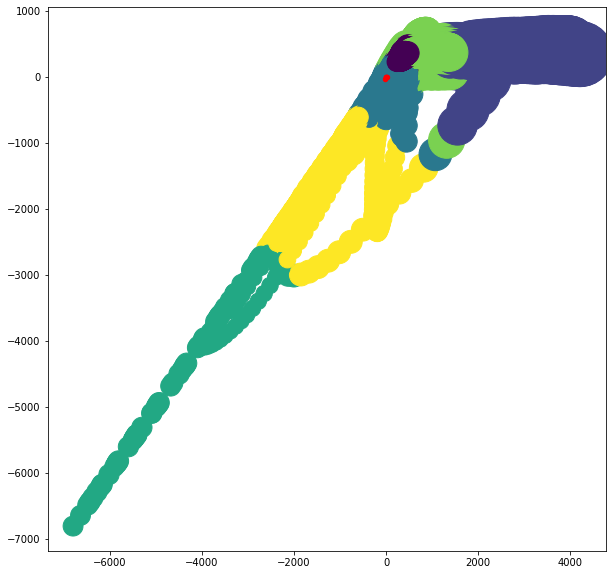

In [ ]:
#Отрисуем кластеры с исхожными ненормированными данными
data_with_clusters = data.copy()
data_with_clusters["Clusters"] = identified_clusters 
plt.figure(figsize=[10,10])
#plt.ylim(-2000, 1000)
#plt.xlim(-2000, 1000)
plt.scatter(data_with_clusters["ch0"], 
            data_with_clusters["ch1"],
            data_with_clusters["ch2"],
            c = data_with_clusters['Clusters'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            s=20,                             
            c='red'
            )                           
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


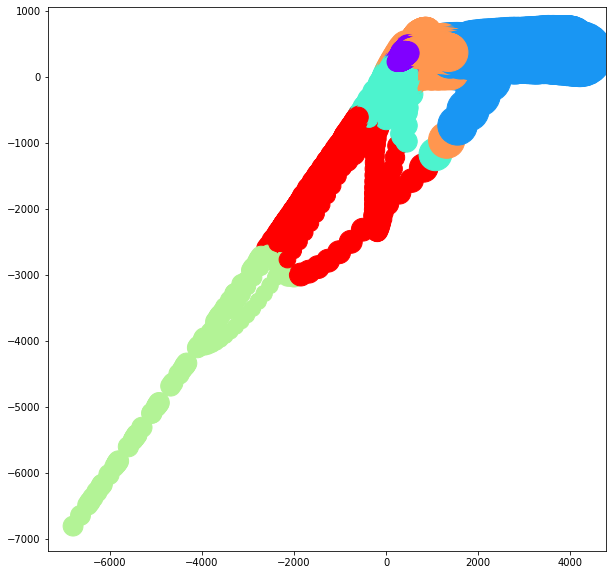

In [ ]:
#Ещё отрисуем кластеры с исхожными ненормированными данными
plt.figure(figsize=[10,10])
plt.scatter(data_with_clusters['ch0'],data_with_clusters['ch1'],data_with_clusters['ch2'],c=data_with_clusters['Clusters'],cmap='rainbow')

WSCC - сумма квадратов расстояний точек от уентра кластера. 
Найдём оптимальное кол-во кластеров.

In [ ]:
wcss=[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(Xclust)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


Text(0, 0.5, 'WCSS')

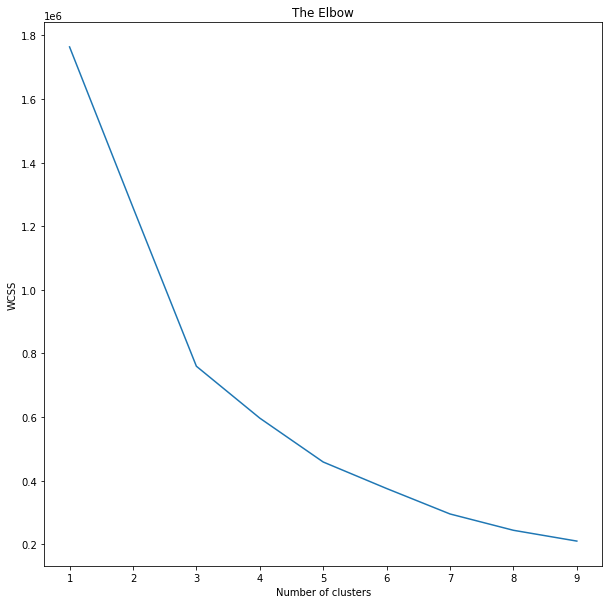

In [ ]:
number_clusters = range(1,10)
plt.figure(figsize=[10,10])
plt.plot(number_clusters,wcss)
plt.title('The Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# остановимся на 5 кластерах